## EA vs NEA feature Visualization
This code reads two files with feature values (EA.txt and NEA.txt), then plots two features at a time on a scatter plot.

#### NEA.txt contains ~50,000 samples, so we randomly sample ~ 1000 points from it to match EA samples

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.naive_bayes import GaussianNB 

# Common Variables

# These sizes are width, height
fs_12_6 = (12,6) # Figure size for 2x 6 inch square plots next to each other
fs_12_12 = (12,12) # Figure size for large single figure
fs_48_12 = (12,48) # Figure size for large single figure

def createfigure():
    fig = plt.figure(figsize=fs_12_6, dpi= 80, facecolor='w', edgecolor='k') # Create new figure
    f0 = fig.add_subplot(111) # Main Figure subplot
    f1 = fig.add_subplot(121) # Clusters Figure
    f2 = fig.add_subplot(122) # Classification Boundary Figure
    plt.tight_layout(pad = 5.0)
    #fig.subplots_adjust(hspace=2.0)
    f0.spines['top'].set_color('none')
    f0.spines['bottom'].set_color('none')
    f0.spines['left'].set_color('none')
    f0.spines['right'].set_color('none')
    f0.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
    # return fig, f1, f2 # Returns a tuple which is immutable
    return [fig, f1, f2] # Returns a list which is changable

def createfigure2_2():
    fig = plt.figure(figsize=fs_12_12, dpi= 80, facecolor='w', edgecolor='k') # Create new figure
    f0 = fig.add_subplot(111) # Main Figure subplot
    f1 = fig.add_subplot(411) # Clusters Figure
    f2 = fig.add_subplot(412) # Classification Boundary Figure
    f3 = fig.add_subplot(413) # Classification Boundary Figure
    f4 = fig.add_subplot(414) # Classification Boundary Figure
    plt.tight_layout(pad = 5.0)
    #fig.subplots_adjust(hspace=2.0)
    f0.spines['top'].set_color('none')
    f0.spines['bottom'].set_color('none')
    f0.spines['left'].set_color('none')
    f0.spines['right'].set_color('none')
    f0.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
    # return fig, f1, f2 # Returns a tuple which is immutable
    return [fig, f1, f2, f3, f4] # Returns a list which is changable

def createfigure4_1():
    fig = plt.figure(figsize=fs_48_12, dpi= 80, facecolor='w', edgecolor='k') # Create new figure
    f0 = fig.add_subplot(111) # Main Figure subplot
    f1 = fig.add_subplot(411) # Clusters Figure
    f2 = fig.add_subplot(412) # Classification Boundary Figure
    f3 = fig.add_subplot(413) # Classification Boundary Figure
    f4 = fig.add_subplot(414) # Classification Boundary Figure
#    plt.tight_layout(pad = 5.0)
    #fig.subplots_adjust(hspace=2.0)
    f0.spines['top'].set_color('none')
    f0.spines['bottom'].set_color('none')
    f0.spines['left'].set_color('none')
    f0.spines['right'].set_color('none')
    f0.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
    # return fig, f1, f2 # Returns a tuple which is immutable
    return [fig, f1, f2, f3, f4] # Returns a list which is changable

In [6]:
dtype_Featurefile = np.dtype([('File_Name', 'S60'), ('mad_roll', np.float64), ('reg_roll', np.float64),
                               ('sum_acc', np.float64), ('manip', np.float64), ('rest_perc', np.float64)])
EAData = np.loadtxt('training-shimmer-ea.txt', dtype = dtype_Featurefile)

dtype_Featurefile = np.dtype([('File_Name', 'S60'), ('mad_roll', np.float64), ('reg_roll', np.float64),
                               ('sum_acc', np.float64), ('manip', np.float64), ('rest_perc', np.float64)])
FullNEAData = np.loadtxt('training-shimmer-non.txt', dtype = dtype_Featurefile)

### Plot all features vs Precentage of time spent in rest (MicroEffort)

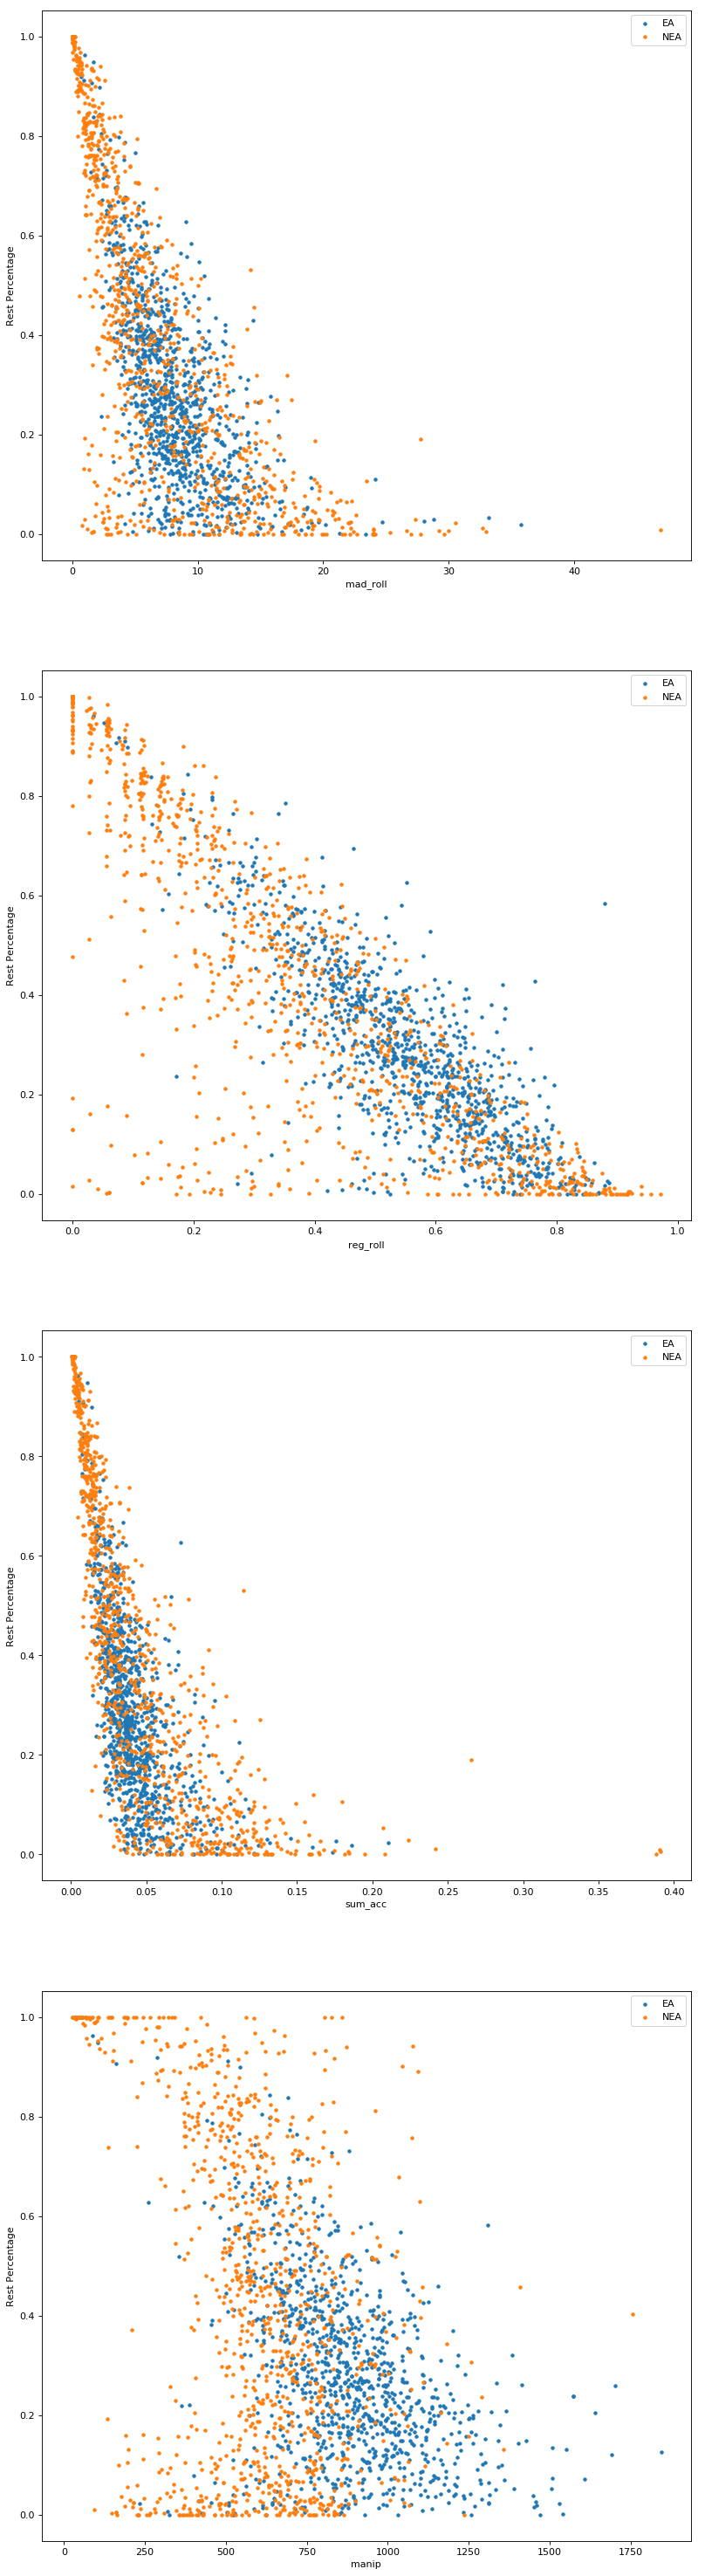

In [16]:
flist1 = createfigure4_1()
SampledNEAData = np.random.choice(FullNEAData, EAData.size)

featnames = ('mad_roll', 'reg_roll', 'sum_acc', 'manip', 'rest_perc')

for X, plot in zip(featnames[:4],(flist1[1], flist1[2], flist1[3], flist1[4])):
    plt.sca(plot)
    plt.scatter(EAData[X], EAData['rest_perc'], marker =  '.', label = 'EA')
    plt.scatter(SampledNEAData[X], SampledNEAData['rest_perc'], marker = '.', label = 'NEA')
    plot.set_xlabel(X) # Operates on given subplot
    plot.set_ylabel('Rest Percentage')
    plot.legend(loc=1)

plt.show()

### Classify using RestPercentage and Manip

Score for Classification:  74.4454713494 %
Means: =>
 [[  8.75299722e+02   2.83327433e-01]
 [  5.74561646e+02   4.46246079e-01]]
Sigmas: =>
 [[  2.16886687e+02   1.78280504e-01]
 [  2.46065184e+02   3.31865697e-01]]


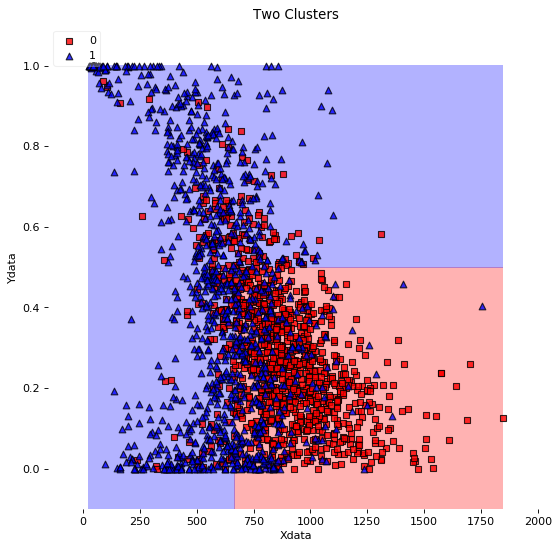

In [44]:
featnames = ('mad_roll', 'reg_roll', 'sum_acc', 'manip', 'rest_perc')

#    plt.scatter(EAData[X], EAData['rest_perc'], marker =  '.', label = 'EA')
#    plt.scatter(SampledNEAData[X], SampledNEAData['rest_perc'], marker = '.', label = 'NEA')

X = np.append(np.column_stack((EAData['manip'],EAData['rest_perc'])),
              np.column_stack((SampledNEAData['manip'],SampledNEAData['rest_perc'])), axis = 0)
Y = np.append(np.zeros(EAData.size), np.ones(SampledNEAData.size)).astype(np.integer)

clf1=GaussianNB()
clf1.fit(X, Y);
print('Score for Classification: ', clf1.score(X, Y)*100, '%')
print('Means: =>\n', clf1.theta_)
print('Sigmas: =>\n', np.sqrt(clf1.sigma_))
fig = plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k') # Create new figure
plot_decision_regions(X=X, y=Y, clf=clf1, legend=2, res = 1.0) # Returns nothing useful
ax = fig.gca()
ax.set_xlabel('Xdata') # Operates on given subplot
ax.set_ylabel('Ydata')
ax.set_title('Two Clusters')
minmaxrange = np.amax(X[:,0]) - np.amin(X[:,0])
min_lim = np.amin(X[:,0]) - (0.1 * minmaxrange)
max_lim = np.amax(X[:,0]) + (0.1 * minmaxrange)
ax.set_xlim(min_lim, max_lim)
minmaxrange = np.amax(X[:,1]) - np.amin(X[:,1])
min_lim = np.amin(X[:,1]) - (0.1 * minmaxrange)
max_lim = np.amax(X[:,1]) + (0.1 * minmaxrange)
ax.set_ylim(min_lim, max_lim)

plt.show()

### Plot other features against each other